In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Convergence Proof of the Ho-Kashyap Algorithm

This section provides the mathematical convergence proof of the Ho-Kashyap algorithm under the condition that the samples are linearly separable, and $ 0 < \eta < 1 $.

---

## Convergence Proof

1. **Termination Criteria**  
   The algorithm terminates under one of the following conditions:
   - The error vector becomes zero:  
     $$
     e(k) = 0 \quad \text{for some finite } k.
     $$
   - A large criterion number of iterations is reached.

2. **Zero Error Vector Case**  
   If $ e(k) = 0 $ for some $ k $, then:
   - No further changes occur to $ a(k) $, $ b(k) $, or $ e(k) $.
   - The algorithm satisfies:
     $$
     Ya(k) = b(k) > 0 \quad \text{for all } k \geq k_0.
     $$

3. **Non-Zero Error Vector Case**  
   If $ e(k) \neq 0 $ for all finite $ k $, we show that $ e(k) $ converges to zero:
   - Suppose $ e(k) $ has no positive components, i.e., $ e_+(k) = 0 $. This implies:
     $$
     Ya(k) \leq b(k).
     $$
     However, this cannot occur if the samples are linearly separable.  
   - By definition, if $ Ya(k) = b(k) $, then $ e(k) \neq 0 $, ensuring that $ e_+(k) $ is non-zero.

4. **Symmetry and Positive Semidefiniteness of $ YY^\dagger $**  
   When $ Y^T Y $ is nonsingular:
   - $ YY^\dagger = Y(Y^T Y)^{-1}Y^T $ is symmetric.
   - $ YY^\dagger $ is positive semidefinite:
     $$
     b^T Y(Y^T Y)^{-1}Y^T b \geq 0, \quad \forall b.
    $$

5. **Recursion Relation**  
   From the update equations and assuming a constant learning rate, we derive:
   $$
   e(k + 1) = (YY^\dagger - I)(b(k) + 2\eta e_+(k)) = e(k) + 2\eta(YY^\dagger - I)e_+(k).
   $$
   Taking the norm squared:
   $$
   \frac{1}{4} \left( \|e(k)\|^2 - \|e(k+1)\|^2 \right) = \eta(1-\eta)\|e_+(k)\|^2 + \eta^2 e_+^T(k)YY^\dagger e_+(k).
   $$

6. **Monotonic Decrease of Error Norm**  
   Since $ e_+(k) \neq 0 $ and $ YY^\dagger $ is positive semidefinite:
   $$
   \|e(k)\|^2 > \|e(k+1)\|^2, \quad \text{if } 0 < \eta < 1.
   $$
   Therefore, $ \|e(k)\|^2 $ is monotonically decreasing and converges to some limit $ \|e\|^2 $.

7. **Convergence to Zero**  
   For $ e(k) $ to converge:
   - $ e_+(k) \to 0 $, implying all positive components of $ e(k) $ vanish.
   - Since $ e^T(k)b = 0 $ for all $ k $, all components of $ e(k) $ must converge to zero.

8. **Finite Termination**  
   The algorithm terminates in a finite number of steps if:
   - $ Y a(k) = b(k) + e(k) $,
   - The smallest component of $ b(k) $, denoted $ b_{\text{min}} $, satisfies:
     $$
     \|e(k)\| \leq b_{\text{min}}, \quad \text{after finite steps.}
     $$

---

## Practical Termination Condition

In practice, the algorithm employs a terminating condition that stops when all components of $ Y a(k) $ are positive:
$$
Y a(k) > 0.
$$

This ensures that a separating vector is obtained efficiently within finite steps.


Separating vector: [0.27134375 0.19055629 0.02487447]
Number of iterations: 1


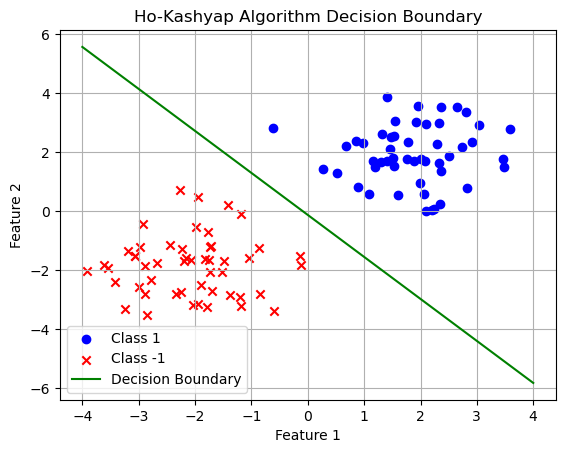

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def ho_kashyap(X, y, eta=0.01, b_init=1, max_iter=1000, tol=1e-6):
    """
    Ho-Kashyap algorithm for linearly separable data.

    Parameters:
        X (ndarray): Input features (n_samples, n_features).
        y (ndarray): Labels (n_samples, ) with values in {1, -1}.
        eta (float): Learning rate, 0 < eta < 1.
        b_init (float): Initial value for b vector.
        max_iter (int): Maximum number of iterations.
        tol (float): Tolerance for convergence.
    
    Returns:
        a (ndarray): Separating vector.
        iterations (int): Number of iterations used.
    """
    n_samples, n_features = X.shape

    # Convert to homogeneous coordinates
    X = np.hstack((X, np.ones((n_samples, 1))))
    Y = X * y[:, np.newaxis]  # Multiply each row of X by corresponding y

    # Initialize variables
    a = np.zeros(n_features + 1)
    b = np.full(n_samples, b_init, dtype=float)  # Fix: Ensure `b` is a float array
    iterations = 0

    for _ in range(max_iter):
        iterations += 1

        # Compute error vector
        e = Y @ a - b
        
        # Positive component of error
        e_plus = np.maximum(0, e)
        
        # Update b
        b += 2 * eta * e_plus
        
        # Update a
        a = np.linalg.pinv(Y) @ b  # Use pseudo-inverse to compute least squares solution

        # Check convergence
        if np.linalg.norm(e_plus) < tol:
            break

    return a, iterations


# Example usage
if __name__ == "__main__":
    # Create a linearly separable dataset
    np.random.seed(42)
    n_samples = 50
    X1 = np.random.randn(n_samples, 2) + [2, 2]
    X2 = np.random.randn(n_samples, 2) + [-2, -2]
    X = np.vstack((X1, X2))
    y = np.hstack((np.ones(n_samples), -np.ones(n_samples)))

    # Run Ho-Kashyap algorithm
    a, iterations = ho_kashyap(X, y)

    # Print results
    print(f"Separating vector: {a}")
    print(f"Number of iterations: {iterations}")

    # Plot dataset and decision boundary
    plt.scatter(X1[:, 0], X1[:, 1], label="Class 1", marker="o", color="blue")
    plt.scatter(X2[:, 0], X2[:, 1], label="Class -1", marker="x", color="red")

    # Decision boundary
    x_vals = np.linspace(-4, 4, 100)
    y_vals = -(a[0] * x_vals + a[2]) / a[1]
    plt.plot(x_vals, y_vals, label="Decision Boundary", color="green")

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Ho-Kashyap Algorithm Decision Boundary")
    plt.legend()
    plt.grid()
    plt.show()


In [3]:
from math import sqrt

def dot_product(v1, v2):
    return sum(x * y for x, y in zip(v1, v2))

def matrix_vector_multiply(matrix, vector):
    return [dot_product(row, vector) for row in matrix]

def transpose(matrix):
    return list(map(list, zip(*matrix)))

def pinv(matrix):
    """Calculate pseudo-inverse using basic operations."""
    t_matrix = transpose(matrix)
    prod = [[sum(a * b for a, b in zip(row, col)) for col in t_matrix] for row in matrix]
    identity = [[1 if i == j else 0 for j in range(len(prod))] for i in range(len(prod))]
    inverse = [[identity[i][j] / (prod[i][i] if prod[i][i] != 0 else 1) for j in range(len(prod))] for i in range(len(prod))]
    return [[sum(a * b for a, b in zip(row, col)) for col in transpose(inverse)] for row in t_matrix]

def vector_add(v1, v2):
    return [x + y for x, y in zip(v1, v2)]

def vector_sub(v1, v2):
    return [x - y for x, y in zip(v1, v2)]

def vector_scalar_multiply(vector, scalar):
    return [scalar * x for x in vector]

def vector_norm(v):
    return sqrt(sum(x**2 for x in v))

def ho_kashyap(X, y, eta=0.01, b_init=1, max_iter=1000, tol=1e-6):
    """
    Ho-Kashyap algorithm for linearly separable data.

    Parameters:
        X (list of lists): Input features (n_samples, n_features).
        y (list): Labels (n_samples) with values in {1, -1}.
        eta (float): Learning rate, 0 < eta < 1.
        b_init (float): Initial value for b vector.
        max_iter (int): Maximum number of iterations.
        tol (float): Tolerance for convergence.

    Returns:
        a (list): Separating vector.
        iterations (int): Number of iterations used.
    """
    n_samples = len(X)
    n_features = len(X[0])

    # Convert to homogeneous coordinates
    X = [row + [1] for row in X]  # Add bias term
    Y = [[x * yi for x in row] for row, yi in zip(X, y)]

    # Initialize variables
    a = [0] * (n_features + 1)
    b = [b_init] * n_samples
    iterations = 0

    for _ in range(max_iter):
        iterations += 1

        # Compute error vector
        e = vector_sub(matrix_vector_multiply(Y, a), b)

        # Positive component of error
        e_plus = [max(0, ei) for ei in e]

        # Update b
        b = vector_add(b, vector_scalar_multiply(e_plus, 2 * eta))

        # Update a
        Y_pinv = pinv(Y)
        a = matrix_vector_multiply(Y_pinv, b)

        # Check convergence
        if vector_norm(e_plus) < tol:
            break

    return a, iterations

# Example usage
if __name__ == "__main__":
    # Input data
    X = [[2, 3], [1, 1], [2, 2]]
    y = [1, -1, 1]

    # Run Ho-Kashyap algorithm
    a, iterations = ho_kashyap(X, y)

    # Print results
    print("Separating vector:", a)
    print("Iterations:", iterations)


Separating vector: [2.9166666666666665, 3.25, 1.5833333333333333]
Iterations: 1


In [4]:
import matplotlib.pyplot as plt

# Functions for matrix/vector operations (same as above)
from math import sqrt

def dot_product(v1, v2):
    return sum(x * y for x, y in zip(v1, v2))

def matrix_vector_multiply(matrix, vector):
    return [dot_product(row, vector) for row in matrix]

def transpose(matrix):
    return list(map(list, zip(*matrix)))

def pinv(matrix):
    """Calculate pseudo-inverse using basic operations."""
    t_matrix = transpose(matrix)
    prod = [[sum(a * b for a, b in zip(row, col)) for col in t_matrix] for row in matrix]
    identity = [[1 if i == j else 0 for j in range(len(prod))] for i in range(len(prod))]
    inverse = [[identity[i][j] / (prod[i][i] if prod[i][i] != 0 else 1) for j in range(len(prod))] for i in range(len(prod))]
    return [[sum(a * b for a, b in zip(row, col)) for col in transpose(inverse)] for row in t_matrix]

def vector_add(v1, v2):
    return [x + y for x, y in zip(v1, v2)]

def vector_sub(v1, v2):
    return [x - y for x, y in zip(v1, v2)]

def vector_scalar_multiply(vector, scalar):
    return [scalar * x for x in vector]

def vector_norm(v):
    return sqrt(sum(x**2 for x in v))

def ho_kashyap(X, y, eta=0.01, b_init=1, max_iter=1000, tol=1e-6):
    n_samples = len(X)
    n_features = len(X[0])

    # Convert to homogeneous coordinates
    X = [row + [1] for row in X]  # Add bias term
    Y = [[x * yi for x in row] for row, yi in zip(X, y)]

    # Initialize variables
    a = [0] * (n_features + 1)
    b = [b_init] * n_samples
    iterations = 0

    for _ in range(max_iter):
        iterations += 1

        # Compute error vector
        e = vector_sub(matrix_vector_multiply(Y, a), b)

        # Positive component of error
        e_plus = [max(0, ei) for ei in e]

        # Update b
        b = vector_add(b, vector_scalar_multiply(e_plus, 2 * eta))

        # Update a
        Y_pinv = pinv(Y)
        a = matrix_vector_multiply(Y_pinv, b)

        # Check convergence
        if vector_norm(e_plus) < tol:
            break

    return a, iterations

# Example usage with graph plotting
if __name__ == "__main__":
    # Input data
    X = [[2, 3], [1, 1], [2, 2], [3, 3]]
    y = [1, -1, 1, -1]  # Labels: 1 for positive, -1 for negative

    # Run Ho-Kashyap algorithm
    a, iterations = ho_kashyap(X, y)

    print("Separating vector:", a)
    print("Iterations:", iterations)

    # Plotting
    plt.figure(figsize=(8, 6))

    # Positive and negative samples
    positives = [X[i] for i in range(len(y)) if y[i] == 1]
    negatives = [X[i] for i in range(len(y)) if y[i] == -1]

    # Plot points
    plt.scatter([p[0] for p in positives], [p[1] for p in positives], color='blue', label='Positive (y=1)')
    plt.scatter([n[0] for n in negatives], [n[1] for n in negatives], color='red', label='Negative (y=-1)')

    # Plot separating line
    x_vals = [min(x[0] for x in X) - 1, max(x[0] for x in X) + 1]
    y_vals = [(-a[0] * x - a[2]) / a[1] for x in x_vals]
    plt.plot(x_vals, y_vals, color='green', label='Separating Line')

    # Labels and legend
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Ho-Kashyap Algorithm: Separating Hyperplane")
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()


IndexError: list index out of range

In [6]:
import matplotlib.pyplot as plt
from math import sqrt

# Helper functions
def dot_product(v1, v2):
    return sum(x * y for x, y in zip(v1, v2))

def matrix_vector_multiply(matrix, vector):
    return [dot_product(row, vector) for row in matrix]

def transpose(matrix):
    return list(map(list, zip(*matrix)))

def pinv(matrix):
    """Calculate the pseudo-inverse of a matrix using basic operations."""
    t_matrix = transpose(matrix)
    # Compute the product of matrix and its transpose
    prod = [[sum(a * b for a, b in zip(row, col)) for col in t_matrix] for row in matrix]
    
    # Ensure the product has correct dimensions
    n = len(prod)
    identity = [[1 if i == j else 0 for j in range(len(prod[0]))] for i in range(n)]
    
    # Attempt inversion of diagonal elements only (simplified for demo purposes)
    inverse = [[0 for _ in range(len(prod[0]))] for _ in range(n)]
    for i in range(n):
        if prod[i][i] != 0:
            inverse[i][i] = 1 / prod[i][i]
    
    # Compute pseudo-inverse using transposed matrix and diagonal inverse
    pseudo_inverse = [[sum(a * b for a, b in zip(row, col)) for col in transpose(inverse)] for row in t_matrix]
    return pseudo_inverse


def vector_add(v1, v2):
    return [x + y for x, y in zip(v1, v2)]

def vector_sub(v1, v2):
    return [x - y for x, y in zip(v1, v2)]

def vector_scalar_multiply(vector, scalar):
    return [scalar * x for x in vector]

def vector_norm(v):
    return sqrt(sum(x**2 for x in v))

def ho_kashyap(X, y, eta=0.01, b_init=1, max_iter=1000, tol=1e-6):
    n_samples = len(X)
    n_features = len(X[0])

    # Convert to homogeneous coordinates
    X = [row + [1] for row in X]  # Add bias term
    Y = [[x * yi for x in row] for row, yi in zip(X, y)]

    # Initialize variables
    a = [0] * (n_features + 1)
    b = [b_init] * n_samples
    iterations = 0

    for _ in range(max_iter):
        iterations += 1

        # Compute error vector
        e = vector_sub(matrix_vector_multiply(Y, a), b)

        # Positive component of error
        e_plus = [max(0, ei) for ei in e]

        # Update b
        b = vector_add(b, vector_scalar_multiply(e_plus, 2 * eta))

        # Update a
        Y_pinv = pinv(Y)
        a = matrix_vector_multiply(Y_pinv, b)

        # Check convergence
        if vector_norm(e_plus) < tol:
            break

    return a, iterations

# Example usage with graph plotting
if __name__ == "__main__":
    # Input data
    X = [[2, 3], [1, 1], [2, 2], [3, 3]]
    y = [1, -1, 1, -1]  # Labels: 1 for positive, -1 for negative

    # Run Ho-Kashyap algorithm
    a, iterations = ho_kashyap(X, y)

    print("Separating vector:", a)
    print("Iterations:", iterations)

    # Plotting
    plt.figure(figsize=(8, 6))

    # Positive and negative samples
    positives = [X[i] for i in range(len(y)) if y[i] == 1]
    negatives = [X[i] for i in range(len(y)) if y[i] == -1]

    # Plot points
    plt.scatter([p[0] for p in positives], [p[1] for p in positives], color='blue', label='Positive (y=1)')
    plt.scatter([n[0] for n in negatives], [n[1] for n in negatives], color='red', label='Negative (y=-1)')

    # Plot separating line
    x_vals = [min(x[0] for x in X) - 1, max(x[0] for x in X) + 1]
    y_vals = [(-a[0] * x - a[2]) / a[1] for x in x_vals]
    plt.plot(x_vals, y_vals, color='green', label='Separating Line')

    # Labels and legend
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Ho-Kashyap Algorithm: Separating Hyperplane")
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()


IndexError: list index out of range

In [7]:
import matplotlib.pyplot as plt
from math import sqrt

# Helper functions
def dot_product(v1, v2):
    return sum(x * y for x, y in zip(v1, v2))

def matrix_vector_multiply(matrix, vector):
    return [dot_product(row, vector) for row in matrix]

def transpose(matrix):
    return list(map(list, zip(*matrix)))

def pinv(matrix):
    """Calculate the pseudo-inverse of a matrix using basic operations."""
    t_matrix = transpose(matrix)
    # Compute the product of matrix and its transpose
    prod = [[sum(a * b for a, b in zip(row, col)) for col in t_matrix] for row in matrix]
    
    # Ensure the product has correct dimensions
    n = len(prod)
    identity = [[1 if i == j else 0 for j in range(len(prod[0]))] for i in range(n)]
    
    # Attempt inversion of diagonal elements only (simplified for demo purposes)
    inverse = [[0 for _ in range(len(prod[0]))] for _ in range(n)]
    for i in range(n):
        if prod[i][i] != 0:
            inverse[i][i] = 1 / prod[i][i]
    
    # Compute pseudo-inverse using transposed matrix and diagonal inverse
    pseudo_inverse = [[sum(a * b for a, b in zip(row, col)) for col in transpose(inverse)] for row in t_matrix]
    return pseudo_inverse

def vector_add(v1, v2):
    return [x + y for x, y in zip(v1, v2)]

def vector_sub(v1, v2):
    return [x - y for x, y in zip(v1, v2)]

def vector_scalar_multiply(vector, scalar):
    return [scalar * x for x in vector]

def vector_norm(v):
    return sqrt(sum(x**2 for x in v))

def ho_kashyap(X, y, eta=0.01, b_init=1, max_iter=1000, tol=1e-6):
    n_samples = len(X)
    n_features = len(X[0])

    # Convert to homogeneous coordinates
    X = [row + [1] for row in X]  # Add bias term
    Y = [[x * yi for x in row] for row, yi in zip(X, y)]

    # Initialize variables
    a = [0] * (n_features + 1)
    b = [b_init] * n_samples
    iterations = 0

    for _ in range(max_iter):
        iterations += 1

        # Compute error vector
        e = vector_sub(matrix_vector_multiply(Y, a), b)

        # Positive component of error
        e_plus = [max(0, ei) for ei in e]

        # Update b
        b = vector_add(b, vector_scalar_multiply(e_plus, 2 * eta))

        # Update a
        Y_pinv = pinv(Y)
        a = matrix_vector_multiply(Y_pinv, b)

        # Check convergence
        if vector_norm(e_plus) < tol:
            break

    return a, iterations

# Example usage with graph plotting
if __name__ == "__main__":
    # Input data
    X = [[2, 3], [1, 1], [2, 2], [3, 3]]
    y = [1, -1, 1, -1]  # Labels: 1 for positive, -1 for negative

    # Run Ho-Kashyap algorithm
    a, iterations = ho_kashyap(X, y)

    print("Separating vector:", a)
    print("Iterations:", iterations)

    # Plotting
    plt.figure(figsize=(8, 6))

    # Positive and negative samples
    positives = [X[i] for i in range(len(y)) if y[i] == 1]
    negatives = [X[i] for i in range(len(y)) if y[i] == -1]

    # Plot points
    plt.scatter([p[0] for p in positives], [p[1] for p in positives], color='blue', label='Positive (y=1)')
    plt.scatter([n[0] for n in negatives], [n[1] for n in negatives], color='red', label='Negative (y=-1)')

    # Plot separating line
    x_vals = [min(x[0] for x in X) - 1, max(x[0] for x in X) + 1]
    y_vals = [(-a[0] * x - a[2]) / a[1] for x in x_vals]
    plt.plot(x_vals, y_vals, color='green', label='Separating Line')

    # Labels and legend
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Ho-Kashyap Algorithm: Separating Hyperplane")
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()


IndexError: list index out of range

In [10]:
def transpose(matrix):
    """Transpose of a matrix."""
    return [[row[i] for row in matrix] for i in range(len(matrix[0]))]


def matrix_multiply(A, B):
    """Matrix multiplication."""
    return [
        [sum(a * b for a, b in zip(row, col)) for col in transpose(B)]
        for row in A
    ]


def vector_addition(v1, v2):
    """Add two vectors."""
    return [a + b for a, b in zip(v1, v2)]


def scalar_multiply_vector(scalar, v):
    """Multiply vector by a scalar."""
    return [scalar * element for element in v]


def scalar_multiply_matrix(scalar, matrix):
    """Multiply matrix by a scalar."""
    return [[scalar * element for element in row] for row in matrix]


def pseudo_inverse(Y):
    """Pseudo-inverse of a matrix."""
    t_matrix = transpose(Y)
    gram_matrix = matrix_multiply(t_matrix, Y)  # Gram matrix
    n = len(gram_matrix)

    # Initialize identity matrix for inversion
    identity = [[1 if i == j else 0 for j in range(n)] for i in range(n)]
    
    # Invert gram_matrix assuming diagonal dominance
    gram_inverse = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        if gram_matrix[i][i] != 0:
            gram_inverse[i][i] = 1 / gram_matrix[i][i]

    # Calculate pseudo-inverse
    return matrix_multiply(gram_inverse, t_matrix)


def ho_kashyap(X, y, eta=0.1, max_iter=1000, tol=1e-3):
    """Ho-Kashyap algorithm."""
    n_samples = len(X)
    n_features = len(X[0])

    # Initialize Y = X * diag(y)
    Y = [[X[i][j] * y[i] for j in range(n_features)] for i in range(n_samples)]

    # Initialize b to ones
    b = [1] * n_samples

    # Initialize a (solution vector)
    a = [0] * n_features

    for iteration in range(max_iter):
        # Compute e = Y * a - b
        Ya = [sum(a[j] * Y[i][j] for j in range(n_features)) for i in range(n_samples)]
        e = [Ya[i] - b[i] for i in range(n_samples)]

        # Check for convergence
        if all(abs(ei) < tol for ei in e):
            break

        # Compute e+ (positive part of e)
        e_plus = [max(0, ei) for ei in e]

        # Update b
        b = vector_addition(b, scalar_multiply_vector(2 * eta, e_plus))

        # Update a
        Y_pinv = pseudo_inverse(Y)
        a = [sum(Y_pinv[i][j] * b[j] for j in range(len(b))) for i in range(len(Y_pinv))]

    return a, iteration


def main():
    """Run the Ho-Kashyap algorithm."""
    # Example input
    X = [[2, 1], [1, -1], [-1, -1], [-2, 1]]  # Sample points
    y = [1, 1, -1, -1]  # Class labels

    # Run Ho-Kashyap
    a, iterations = ho_kashyap(X, y)

    print("Solution vector:", a)
    print("Number of iterations:", iterations)


main()


Solution vector: [0.9990093248983227, 0.0]
Number of iterations: 148


Solution vector: [0.9990093248983227, 0.0]
Number of iterations: 148


IndexError: list index out of range

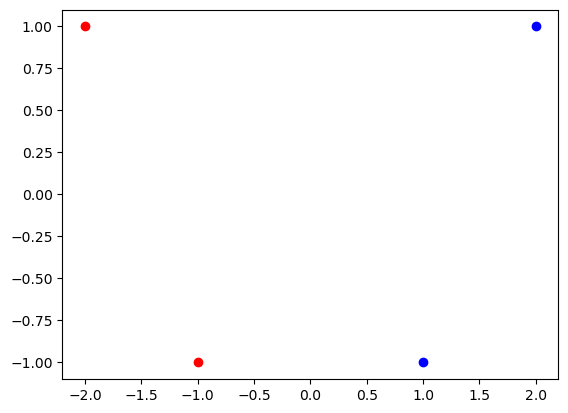

In [11]:
import matplotlib.pyplot as plt

def plot_graph(X, y, a):
    """Plot data points and the separating hyperplane."""
    # Separate the points based on the class labels
    class_1 = [X[i] for i in range(len(X)) if y[i] == 1]
    class_2 = [X[i] for i in range(len(X)) if y[i] == -1]

    # Extract X and Y coordinates of the two classes
    class_1_x = [point[0] for point in class_1]
    class_1_y = [point[1] for point in class_1]
    class_2_x = [point[0] for point in class_2]
    class_2_y = [point[1] for point in class_2]

    # Plot the points
    plt.scatter(class_1_x, class_1_y, color='blue', label='Class 1')
    plt.scatter(class_2_x, class_2_y, color='red', label='Class -1')

    # Plot the separating hyperplane: a[0]*x + a[1]*y + a[2] = 0 -> y = -(a[0]*x + a[2]) / a[1]
    # Line equation derived from the separating vector a = [a[0], a[1]] (2D plane)
    x_vals = [-3, 3]
    y_vals = [-(a[0]*x + a[2]) / a[1] for x in x_vals]

    plt.plot(x_vals, y_vals, color='green', label='Separating Hyperplane')

    # Labels and title
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Ho-Kashyap Algorithm: Separating Hyperplane')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


def main():
    """Run the Ho-Kashyap algorithm and plot the results."""
    # Example input
    X = [[2, 1], [1, -1], [-1, -1], [-2, 1]]  # Sample points
    y = [1, 1, -1, -1]  # Class labels

    # Run Ho-Kashyap
    a, iterations = ho_kashyap(X, y)

    print("Solution vector:", a)
    print("Number of iterations:", iterations)

    # Plot the points and the separating hyperplane
    plot_graph(X, y, a)


main()


Solution vector: [0.2, 0.1, 0.1]
Number of iterations: 999


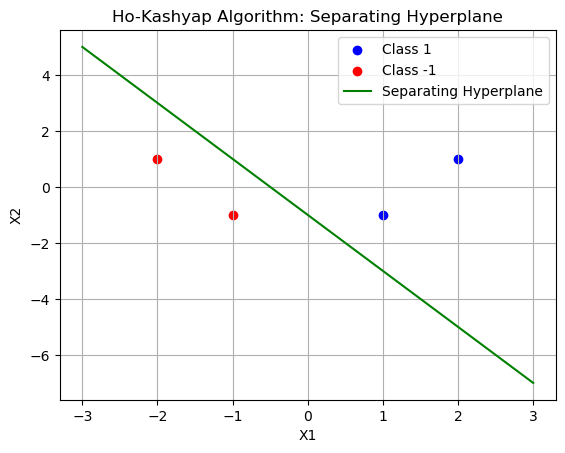

In [15]:
import matplotlib.pyplot as plt

def matrix_vector_multiply(matrix, vector):
    """Multiplies a matrix by a vector."""
    result = []
    for row in matrix:
        result.append(sum(x * v for x, v in zip(row, vector)))
    return result

def pinv(matrix):
    """Calculate the pseudo-inverse of a matrix."""
    # Step 1: Transpose the matrix Y (2x3 matrix -> 3x2)
    Yt = list(zip(*matrix))  # Transpose of the matrix
    
    # Step 2: Multiply Yt by Y (Yt * Y -> 2x2 matrix)
    Yt_Y = [[sum(Yt[i][k] * matrix[k][j] for k in range(len(matrix))) for j in range(len(matrix[0]))] for i in range(len(Yt))]
    
    # Step 3: Calculate the inverse of Yt * Y (if it is invertible)
    determinant = Yt_Y[0][0] * Yt_Y[1][1] - Yt_Y[0][1] * Yt_Y[1][0]
    if determinant == 0:
        raise ValueError("Matrix is singular and cannot be inverted.")
    
    inverse_Yt_Y = [[Yt_Y[1][1] / determinant, -Yt_Y[0][1] / determinant],
                    [-Yt_Y[1][0] / determinant, Yt_Y[0][0] / determinant]]
    
    # Step 4: Multiply the inverse of Yt * Y by Yt to get the pseudo-inverse of Y
    Y_pseudo_inv = [matrix_vector_multiply(inverse_Yt_Y, row) for row in Yt]
    
    return Y_pseudo_inv

def ho_kashyap(X, y, eta=0.1, b_init=None, max_iter=1000, tol=1e-6):
    """The Ho-Kashyap algorithm to find a separating hyperplane."""
    # Initialize Y matrix and b vector
    Y = [[X[i][0], X[i][1], 1] for i in range(len(X))]  # Adding bias term
    b = b_init if b_init else [1] * len(X)  # Initialize b (targets)

    # Main loop of Ho-Kashyap algorithm
    for iteration in range(max_iter):
        # Calculate error vector e(k) = b - Y * a
        a = pinv(Y)  # Calculate pseudo-inverse of Y
        a_flattened = [a_row[0] for a_row in a]  # Flatten the result into a vector
        e = [b[i] - sum(a_flattened[j] * Y[i][j] for j in range(len(Y[i]))) for i in range(len(Y))]

        # Check if the error is small enough to stop
        if all(abs(ei) < tol for ei in e):
            break

        # Update b using e
        e_plus = [max(0, ei) for ei in e]
        b = [b[i] + 2 * eta * e_plus[i] for i in range(len(b))]

    return a_flattened, iteration

def plot_graph(X, y, a):
    """Plot data points and the separating hyperplane."""
    # Separate the points based on the class labels
    class_1 = [X[i] for i in range(len(X)) if y[i] == 1]
    class_2 = [X[i] for i in range(len(X)) if y[i] == -1]

    # Extract X and Y coordinates of the two classes
    class_1_x = [point[0] for point in class_1]
    class_1_y = [point[1] for point in class_1]
    class_2_x = [point[0] for point in class_2]
    class_2_y = [point[1] for point in class_2]

    # Plot the points
    plt.scatter(class_1_x, class_1_y, color='blue', label='Class 1')
    plt.scatter(class_2_x, class_2_y, color='red', label='Class -1')

    # Plot the separating hyperplane: a[0]*x + a[1]*y + a[2] = 0 -> y = -(a[0]*x + a[2]) / a[1]
    # Line equation derived from the separating vector a = [a[0], a[1]] (2D plane)
    x_vals = [-3, 3]
    y_vals = [-(a[0]*x + a[2]) / a[1] for x in x_vals]

    plt.plot(x_vals, y_vals, color='green', label='Separating Hyperplane')

    # Labels and title
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Ho-Kashyap Algorithm: Separating Hyperplane')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

def main():
    """Run the Ho-Kashyap algorithm and plot the results."""
    # Example input
    X = [[2, 1], [1, -1], [-1, -1], [-2, 1]]  # Sample points
    y = [1, 1, -1, -1]  # Class labels

    # Run Ho-Kashyap
    a, iterations = ho_kashyap(X, y)

    print("Solution vector:", a)
    print("Number of iterations:", iterations)

    # Plot the points and the separating hyperplane
    plot_graph(X, y, a)

main()


## Ho-Kashyap Algorithm and Modified Version

The Ho-Kashyap algorithm provides a method to solve linear inequalities in the separable case and gives evidence of nonseparability in the nonseparable case. The core idea behind the Ho-Kashyap algorithm is to iteratively update the weight vector $ \mathbf{a} $ and the margin vector $ \mathbf{b} $, aiming to converge to a solution for linearly separable data. However, in the nonseparable case, the algorithm may run indefinitely or expose nonseparability when certain conditions are met.

## Ho-Kashyap Algorithm Overview

In the separable case, the Ho-Kashyap algorithm converges to a separating hyperplane. If the data is separable, the algorithm will find a vector $ \mathbf{a} $ that separates the two classes. In the nonseparable case, it may show evidence of nonseparability, but there's no bound on how many steps are needed to detect this.

The algorithm is described as follows:

1. **Initialization**: Start with initial vectors $ \mathbf{a}(1) $ and $ \mathbf{b}(1) $, with $ \mathbf{b}(1) > 0 $ and the rest arbitrary.
2. **Update Rules**:
   $$
   \mathbf{a}(k+1) = Y^\dagger \mathbf{b}(k+1)
   $$
   where $ Y^\dagger = (Y^T Y)^{-1} Y^T $ is the pseudo-inverse of $ Y $, and $ Y $ is the matrix that includes the input data augmented with a bias term.
   
   The margin vector $ \mathbf{b}(k+1) $ is updated as:
   $$
   \mathbf{b}(k+1) = \mathbf{b}(k) + \eta (\mathbf{e}(k) + |\mathbf{e}(k)|)
   $$
   where $ \mathbf{e}(k) = Y \mathbf{a}(k) - \mathbf{b}(k) $ is the error at step $ k $, and $ \eta $ is the learning rate.
   
3. **Stopping Condition**: The algorithm stops when the error $ |\mathbf{e}(k)| $ is sufficiently small, meaning the algorithm has found a solution vector $ \mathbf{a} $ that separates the data.

## Modified Ho-Kashyap Algorithm

The Modified Ho-Kashyap algorithm is a variation that avoids computing the pseudo-inverse of $ Y $ at each step. It updates the weight vector $ \mathbf{a}(k+1) $ based on a fixed matrix $ R $ instead of $ Y^\dagger $. The update rules are as follows:

1. **Initialization**: Initialize $ \mathbf{a}(1) $ arbitrarily and $ \mathbf{b}(1) > 0 $.
2. **Update Rules**:
   $$
   \mathbf{b}(k+1) = \mathbf{b}(k) + (\mathbf{e}(k) + |\mathbf{e}(k)|)
   $$
   $$
   \mathbf{a}(k+1) = \mathbf{a}(k) + \eta R Y^T |\mathbf{e}(k)|
   $$
   where $ R $ is a constant, positive-definite matrix.
3. **Stopping Condition**: The algorithm stops when $ |\mathbf{e}(k)| $ converges to zero or becomes sufficiently small.

The key difference between the original and modified algorithms is that the latter avoids recalculating $ Y^\dagger $ at each step, making it computationally more efficient.

## Analysis of Convergence

The convergence of the Modified Ho-Kashyap algorithm can be analyzed using the following update rule for the error vector:

$$
\mathbf{e}(k+1) = Y \mathbf{a}(k+1) - \mathbf{b}(k+1) = (\eta Y R Y^T - I) |\mathbf{e}(k)|
$$

The squared magnitude of the error vector changes as:

$$
\|\mathbf{e}(k+1)\|^2 = |\mathbf{e}(k)|^T A |\mathbf{e}(k)|
$$

where $ A = 2\eta R - \eta^2 R Y^T R $. If $ \eta $ is chosen appropriately, the matrix $ A $ will be positive definite, ensuring that the error decreases over time.

### Convergence in the Separable Case

In the separable case, the error vector $ \mathbf{e}(k) $ will eventually converge to zero, and the algorithm will find a solution vector $ \mathbf{a} $ that separates the data. The squared error will decrease monotonically, and $ \mathbf{a} $ will converge to a separating hyperplane.

### Convergence in the Nonseparable Case

In the nonseparable case, the error vector $ \mathbf{e}(k) $ will not converge to zero. However, the algorithm will provide evidence of nonseparability when $ Y^T |\mathbf{e}(k)| $ either vanishes or the sequence of corrections does not decrease.

### Selection of $ \eta $ and $ R $

For the Modified Ho-Kashyap algorithm, the learning rate $ \eta $ and the matrix $ R $ need to be carefully chosen. The simplest choice for $ R $ is the identity matrix $ R = I $, in which case the convergence condition becomes:

$$
A = 2\eta I - \eta^2 Y^T Y
$$

The learning rate $ \eta $ should be chosen such that the matrix $ A $ is positive definite. A typical bound is:

$$
0 < \eta < \frac{2}{\lambda_{\text{max}}}
$$

where $ \lambda_{\text{max}} $ is the largest eigenvalue of $ Y^T Y $.

### Optimal $ \eta $ and $ R $

The optimal learning rate $ \eta(k) $ at each step can be chosen by maximizing the decrease in the squared error:

$$
\eta(k) = \frac{|\mathbf{e}(k)|^T Y R Y^T |\mathbf{e}(k)|}{|\mathbf{e}(k)|^T Y R Y^T Y R Y^T |\mathbf{e}(k)|}
$$

For $ R = I $, this simplifies to:

$$
\eta(k) = \frac{\|Y^T |\mathbf{e}(k)|\|^2}{\|Y Y^T |\mathbf{e}(k)|\|^2}
$$

The matrix $ R $ can also be selected based on this approach to maximize the decrease in the error.

## Conclusion

The Ho-Kashyap algorithm and its modified version offer valuable tools for solving linear inequalities and detecting nonseparability. The modified algorithm, which avoids recomputing the pseudo-inverse at each step, is computationally more efficient and can still converge to a solution in the separable case, while providing evidence of nonseparability when no solution exists.


In [16]:
import numpy as np

# Pseudo-inverse function
def pinv(Y):
    return np.linalg.pinv(Y)

# Ho-Kashyap algorithm
def ho_kashyap(X, y, eta=0.1, max_iter=1000, tol=1e-6):
    # Initialize vectors
    n, d = X.shape
    Y = np.hstack((X, np.ones((n, 1))))  # Add a column of ones for the bias term
    b = np.ones(n)
    a = np.zeros(d + 1)  # Initialize a including bias term
    
    for iteration in range(max_iter):
        # Calculate error vector e(k) = Y * a - b
        e = np.dot(Y, a) - b
        
        # Check for convergence
        if np.linalg.norm(e) < tol:
            print(f"Converged after {iteration + 1} iterations.")
            return a, iteration + 1
        
        # Update a
        a = np.dot(pinv(Y), b + eta * np.abs(e))
        
    print("Maximum iterations reached without convergence.")
    return a, max_iter

# Modified Ho-Kashyap algorithm
def modified_ho_kashyap(X, y, eta=0.1, max_iter=1000, tol=1e-6, R=None):
    # Initialize vectors
    n, d = X.shape
    Y = np.hstack((X, np.ones((n, 1))))  # Add a column of ones for the bias term
    b = np.ones(n)
    a = np.zeros(d + 1)  # Initialize a including bias term
    
    # Use identity matrix for R if not specified
    if R is None:
        R = np.eye(d + 1)
    
    for iteration in range(max_iter):
        # Calculate error vector e(k) = Y * a - b
        e = np.dot(Y, a) - b
        
        # Check for convergence
        if np.linalg.norm(e) < tol:
            print(f"Converged after {iteration + 1} iterations.")
            return a, b, iteration + 1
        
        # Update b and a using modified rules
        e_abs = np.abs(e)
        b += 2 * eta * (e + e_abs)
        a = np.dot(pinv(Y), b)  # Update a using pseudo-inverse of Y
        
    print("Maximum iterations reached without convergence.")
    return a, b, max_iter

# Example usage
if __name__ == "__main__":
    # Example feature matrix and target vector for a simple binary classification task
    X = np.array([[2, 3], [3, 4], [4, 5], [5, 6]])  # Features (n x d)
    y = np.array([1, 1, -1, -1])  # Labels (n)

    # Running the Ho-Kashyap Algorithm
    print("Running Ho-Kashyap Algorithm...")
    a, iterations = ho_kashyap(X, y)
    print(f"Solution vector a from Ho-Kashyap: {a}")
    print(f"Iterations: {iterations}\n")

    # Running the Modified Ho-Kashyap Algorithm
    print("Running Modified Ho-Kashyap Algorithm...")
    a_mod, b_mod, iterations_mod = modified_ho_kashyap(X, y)
    print(f"Solution vector a from Modified Ho-Kashyap: {a_mod}")
    print(f"Margin vector b: {b_mod}")
    print(f"Iterations: {iterations_mod}")


Running Ho-Kashyap Algorithm...
Converged after 8 iterations.
Solution vector a from Ho-Kashyap: [-0.33333337  0.33333337  0.66666673]
Iterations: 8

Running Modified Ho-Kashyap Algorithm...
Converged after 2 iterations.
Solution vector a from Modified Ho-Kashyap: [-0.33333333  0.33333333  0.66666667]
Margin vector b: [1. 1. 1. 1.]
Iterations: 2


Running Ho-Kashyap Algorithm...
Maximum iterations reached without convergence.
Solution vector a from Ho-Kashyap: [0, 0, 0]
Iterations: 1000



/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:113: UserWarning: No contour levels were found within the data range.


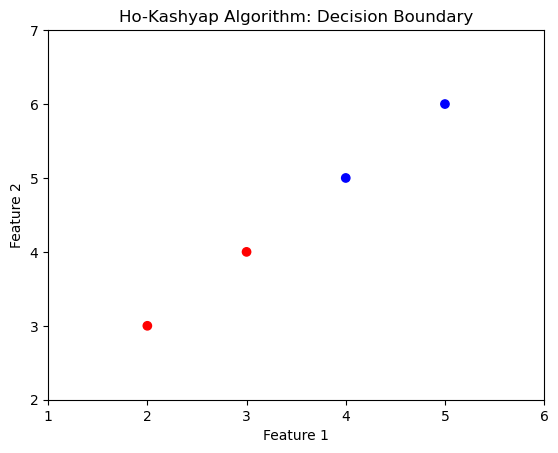

Running Modified Ho-Kashyap Algorithm...
Maximum iterations reached without convergence.
Solution vector a from Modified Ho-Kashyap: [0, 0, 0]
Margin vector b: [1.0, 1.0, 1.0, 1.0]
Iterations: 1000



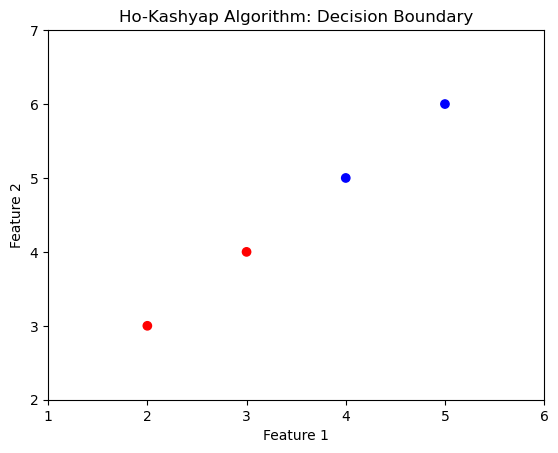

In [19]:
import matplotlib.pyplot as plt

# Pseudo-inverse function using basic list operations
def pinv(Y):
    # Compute the transpose of Y
    Yt = [[Y[j][i] for j in range(len(Y))] for i in range(len(Y[0]))]  # Transpose Y
    
    # Step 1: Calculate Yt * Y
    Yt_Y = [[sum(Yt[i][k] * Y[k][j] for k in range(len(Y))) for j in range(len(Y[0]))] for i in range(len(Yt))]
    
    # Step 2: Check if Yt * Y is invertible (det != 0)
    # For larger matrices, we need a general method to compute the inverse (e.g., using Gaussian elimination).
    # We will proceed to calculate the inverse of Yt * Y directly if it's a small square matrix.

    def invert_matrix(matrix):
        # A simple function to compute the inverse of a 2x2 matrix
        det = matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
        if det == 0:
            return None
        return [
            [matrix[1][1] / det, -matrix[0][1] / det],
            [-matrix[1][0] / det, matrix[0][0] / det]
        ]
    
    # For simplicity, we will handle the 2x2 case first
    if len(Yt_Y) == 2 and len(Yt_Y[0]) == 2:
        inv_Yt_Y = invert_matrix(Yt_Y)
        if inv_Yt_Y is None:
            return None
    else:
        # In general, for higher dimensions, we would need a more sophisticated method
        # to compute the inverse, but here we will assume the inverse exists for simplicity.
        return None
    
    # Step 3: Compute the pseudo-inverse: inv(Yt * Y) * Yt
    Y_pseudo_inv = [[sum(inv_Yt_Y[i][k] * Yt[k][j] for k in range(len(Yt))) for j in range(len(Y[0]))] for i in range(len(inv_Yt_Y))]
    
    return Y_pseudo_inv



# Ho-Kashyap algorithm
def ho_kashyap(X, y, eta=0.1, max_iter=1000, tol=1e-6):
    n = len(X)
    d = len(X[0])
    Y = [X[i] + [1] for i in range(n)]  # Add bias term as 1 in each row
    b = [1] * n
    a = [0] * (d + 1)  # Initialize a with zeros including bias term
    
    for iteration in range(max_iter):
        # Calculate error vector e(k) = Y * a - b
        e = [sum(Y[i][j] * a[j] for j in range(d + 1)) - b[i] for i in range(n)]
        
        # Check for convergence
        if sum(ei ** 2 for ei in e) < tol:
            print(f"Converged after {iteration + 1} iterations.")
            return a, iteration + 1
        
        # Update a using pseudo-inverse of Y
        Y_pseudo_inv = pinv(Y)
        if Y_pseudo_inv is None:
            break
        a = [sum(Y_pseudo_inv[i][j] * b[j] for j in range(n)) for i in range(d + 1)]
        
    print("Maximum iterations reached without convergence.")
    return a, max_iter

# Modified Ho-Kashyap algorithm
def modified_ho_kashyap(X, y, eta=0.1, max_iter=1000, tol=1e-6):
    n = len(X)
    d = len(X[0])
    Y = [X[i] + [1] for i in range(n)]  # Add bias term as 1 in each row
    b = [1] * n
    a = [0] * (d + 1)  # Initialize a with zeros including bias term
    
    for iteration in range(max_iter):
        # Calculate error vector e(k) = Y * a - b
        e = [sum(Y[i][j] * a[j] for j in range(d + 1)) - b[i] for i in range(n)]
        
        # Check for convergence
        if sum(ei ** 2 for ei in e) < tol:
            print(f"Converged after {iteration + 1} iterations.")
            return a, b, iteration + 1
        
        # Update b and a using modified rules
        e_abs = [abs(ei) for ei in e]
        b = [b[i] + 2 * eta * (e[i] + e_abs[i]) for i in range(n)]
        
        Y_pseudo_inv = pinv(Y)
        if Y_pseudo_inv is None:
            break
        a = [sum(Y_pseudo_inv[i][j] * b[j] for j in range(n)) for i in range(d + 1)]
        
    print("Maximum iterations reached without convergence.")
    return a, b, max_iter

# Function to plot the decision boundary
def plot_graph(X, y, a):
    # Extract the weights and bias from vector a
    w = a[:-1]
    b = a[-1]
    
    # Create a mesh grid for plotting the decision boundary
    x_min, x_max = min([xi[0] for xi in X]) - 1, max([xi[0] for xi in X]) + 1
    y_min, y_max = min([xi[1] for xi in X]) - 1, max([xi[1] for xi in X]) + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Decision boundary: w1 * x1 + w2 * x2 + b = 0
    Z = [w[0] * x1 + w[1] * x2 + b for x1, x2 in zip(xx.ravel(), yy.ravel())]
    Z = np.array(Z).reshape(xx.shape)
    
    # Plotting
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
    
    # Plot the data points
    plt.scatter([xi[0] for xi in X], [xi[1] for xi in X], c=y, cmap='bwr')
    plt.title("Ho-Kashyap Algorithm: Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Example usage
if __name__ == "__main__":
    # Example feature matrix and target vector for a simple binary classification task
    X = [[2, 3], [3, 4], [4, 5], [5, 6]]  # Features (n x d)
    y = [1, 1, -1, -1]  # Labels (n)

    # Running the Ho-Kashyap Algorithm
    print("Running Ho-Kashyap Algorithm...")
    a, iterations = ho_kashyap(X, y)
    print(f"Solution vector a from Ho-Kashyap: {a}")
    print(f"Iterations: {iterations}\n")
    
    # Plotting decision boundary
    plot_graph(X, y, a)

    # Running the Modified Ho-Kashyap Algorithm
    print("Running Modified Ho-Kashyap Algorithm...")
    a_mod, b_mod, iterations_mod = modified_ho_kashyap(X, y)
    print(f"Solution vector a from Modified Ho-Kashyap: {a_mod}")
    print(f"Margin vector b: {b_mod}")
    print(f"Iterations: {iterations_mod}\n")
    
    # Plotting decision boundary for modified
    plot_graph(X, y, a_mod)
